In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import mean_squared_error
from math import sqrt

### Step 1: Load Data and Generate Random Data Scatter Plot 
### Step 2: Data Preprocessing


##### Data Cleaning and Preparation for Machine Learning

The following Python code demonstrates how to perform essential data cleaning and preparation steps before building a machine learning model.

1. **Convert 'Date' to DateTime Format**: The 'Date' column is transformed into a datetime object for easier time-based operations.
2. . **Remove Missing Values**: Any rows with missing data are dropped to avoid issues during model training.
3. **Convert Columns to Numeric**: Features (`x1`, `x2`, `x3`, `x4`, `x5`) and the target variable (`y`) are converted to numeric values. If any non-numeric values are found, they are replaced with `NaN`.
4. **Handle Infinite Values**: Infinite values (`np.inf`, `-np.inf`) are replaced with `NaN` and subsequently removed.
5. **Prepare Features and Target**: The selected features are stored in `X`, and the target variable is stored in `y` for machine learning purposes.


**Prompt**: “Write Python code that performs data cleaning and feature preparation for machine learning. The dataset contains features x1, x2, x3, x4, x5, and a target variable y"

In [43]:
df = pd.read_csv("2330-training.csv")
df

,Date,y,x1,x2,x3,x4,x5
0,11/15/2023,581,572,571,557,557,556
1,11/16/2023,583,581,572,571,557,557
2,11/17/2023,580,583,581,572,571,557
3,11/20/2023,577,580,583,581,572,571
4,11/21/2023,585,577,580,583,581,572
...,...,...,...,...,...,...,...
212,09/30/2024,957,"1,000.00","1,015.00","1,005.00",987,977
213,10/01/2024,972,957,"1,000.00","1,015.00","1,005.00",987
214,10/04/2024,977,972,957,"1,000.00","1,015.00","1,005.00"
215,10/07/2024,"1,005.00",977,972,957,"1,000.00","1,015.00"


In [44]:
# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()
df[['x1', 'x2', 'x3', 'x4', 'x5', 'y']] = df[['x1', 'x2', 'x3', 'x4', 'x5', 'y']].apply(pd.to_numeric, errors='coerce')
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Prepare Features and Target
features = ['x1', 'x2', 'x3', 'x4', 'x5']
X = df[features]
y = df['y']

In [45]:
# Prepare Features and Target
features = ['x1', 'x2', 'x3', 'x4', 'x5']
X = df[features]
y = df['y']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data types and perform necessary conversions
print("Feature data types:", X_train.dtypes)
print("Target variable data type:", y_train.dtype)

Feature data types: x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
dtype: object
Target variable data type: float64


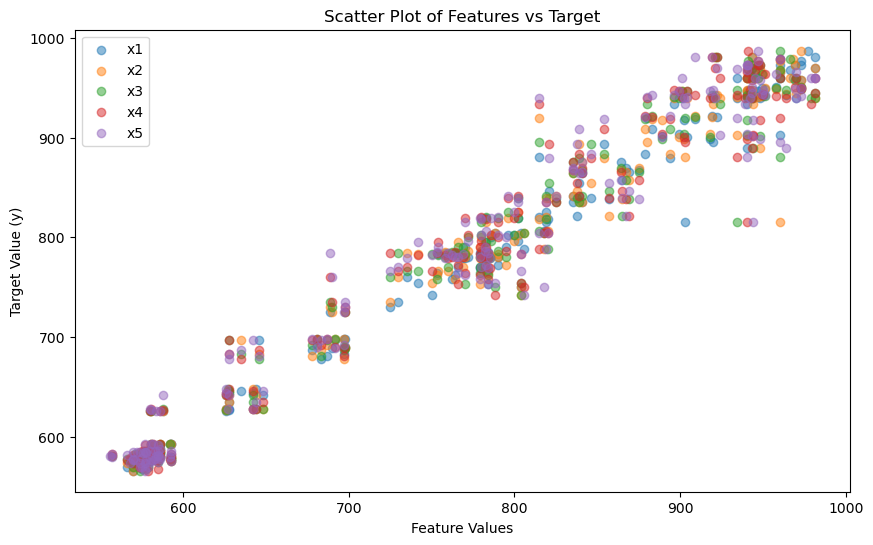

In [46]:
# Generate random data scatter plot
plt.figure(figsize=(10, 6))
for feature in ['x1', 'x2', 'x3', 'x4', 'x5']:
    plt.scatter(df[feature], df['y'], alpha=0.5, label=feature)
plt.xlabel('Feature Values')
plt.ylabel('Target Value (y)')
plt.title('Scatter Plot of Features vs Target')
plt.legend()
plt.show()

##### Calculating Adjusted R-Squared for All Feature Combinations

This code demonstrates how to calculate the adjusted R-squared value for different combinations of features in a dataset, using Ordinary Least Squares (OLS) regression from the `statsmodels` library.

1. **Function to Compute Adjusted R-Squared**: The `get_adj_r_squared` function calculates the adjusted R-squared value for a given set of features and target variable using an OLS model.
2. **Iterate Through All Feature Combinations**: By iterating over all possible combinations of the features, we calculate the adjusted R-squared value for each combination, helping to identify the optimal feature set.
3. **Results**: The results are stored as a list of dictionaries, each containing the feature combination, the number of features, and the corresponding adjusted R-squared value.

**Prompt**: “Write a Python function that calculates the adjusted R-squared value for a given set of features and uses it to evaluate all possible feature combinations"

In [47]:
# Create a function to calculate the adjusted R-squared
def get_adj_r_squared(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() # Fit the OLS model
    return model.rsquared_adj # Return adjusted R-squared

# Try all possible feature combinations
results = []
for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        X_subset = X[list(combo)]
        adj_r_squared = get_adj_r_squared(X_subset, y)
        results.append({
            'features': combo,
            'num_features': len(combo),
            'adj_r_squared': adj_r_squared
        })

In [48]:
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by adjusted R-squared in descending order
results_df = results_df.sort_values('adj_r_squared', ascending=False)

# Print the top 10 feature combinations
print("Top 10 Best Feature Combinations: ")
print(results_df.head(10))

Top 10 Best Feature Combinations: 
                features  num_features  adj_r_squared
30  (x1, x2, x3, x4, x5)             5       0.986430
25      (x1, x2, x3, x4)             4       0.986429
15          (x1, x2, x3)             3       0.986382
26      (x1, x2, x3, x5)             4       0.986311
18          (x1, x3, x4)             3       0.986122
6               (x1, x3)             2       0.986121
28      (x1, x3, x4, x5)             4       0.986067
19          (x1, x3, x5)             3       0.986052
8               (x1, x5)             2       0.985629
7               (x1, x4)             2       0.985615


### Step 3: Build Model

##### Building the Final Model Using the Best Feature Combination

The following code demonstrates how to build a final model based on the best feature combination (i.e., the one with the highest adjusted R-squared value) and use it for predictions.

Steps:
1. **Select the Best Features**: The feature combination with the highest adjusted R-squared value is selected from the sorted DataFrame.
2. **Build the Final Model**: An Ordinary Least Squares (OLS) model is created using these best features.
3. **Print Model Summary**: The summary of the model is printed to show key statistics, including coefficients and R-squared values.
4. **Make Predictions**: The model is used to make predictions on the dataset using the selected features.

**Prompt**: “Write Python code to build a final model using the best feature combination from a sorted DataFrame"

In [49]:
# Step 3: Build Model
final_model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print("\nModel Summary for Best Feature Combination with Autoregression:")
print(final_model.summary())


Model Summary for Best Feature Combination with Autoregression:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.971e+04
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                   4.84e-249
Time:                        20:33:32   Log-Likelihood:                         -647.12
No. Observations:                 154   AIC:                                      1304.
Df Residuals:                     149   BIC:                                      1319.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t| 

### Step 4: Model Evaluation

##### Plotting Actual vs. Predicted Values Over Time

The following Python code uses `matplotlib` to plot a time series comparison between the actual values and the predicted values from the final model.

Steps:
1. **Plot the Actual Values**: The original values (`y`) are plotted against the 'Date' in orange.
2. **Plot the Predicted Values**: The predicted values from the model are plotted on the same graph in blue.
3. **Title and Labels**: The title includes the best feature combination used for the prediction, and the x-axis and y-axis are labeled accordingly.
4. **Legend**: A legend is included to distinguish between the actual and predicted values.


**Prompt**: “Write Python code that creates a plot to compare actual and predicted values over time"

In [50]:
train_predictions = final_model.predict(X_train)
test_predictions = final_model.predict(X_test)

# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

print(f'\nTrain RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 16.169563684557303
Test RMSE: 17.54554199761324


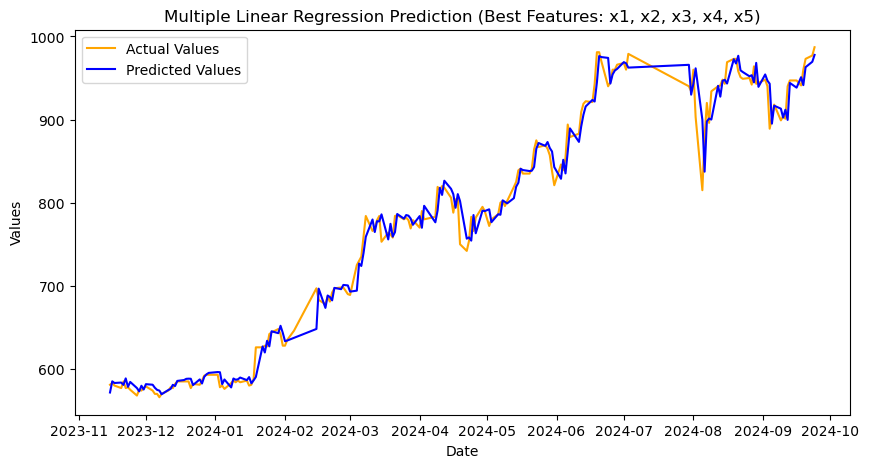

In [54]:
# Combine train and test predictions
all_predictions = pd.concat([pd.Series(train_predictions, index=y_train.index), 
                             pd.Series(test_predictions, index=y_test.index)])

plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
plt.plot(df.index, df['y'], label='Actual Values', color='orange')  # Plot actual values
plt.plot(all_predictions.index, all_predictions, label='Predicted Values', color='blue')  # Plot predicted values
plt.title(f'Autoregressive Model Prediction)')  # Title
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Values')  # Label for y-axis
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()  # Display the plot

# Optional: Add future predictions to the plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], label='Actual Values', color='orange')
plt.plot(all_predictions.index, all_predictions, label='Predicted Values', color='blue')
plt.plot(future_dates, future_df['const'], label='Future Predictions', color='red')
plt.title(f'Autoregressive Model Prediction with Future Forecast (Best Features: {", ".join(best_features)})')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a Prediction Funnel Plot with Confidence Intervals

The following Python code generates a funnel plot comparing actual and predicted values with a 95% confidence interval using results from a multiple linear regression model. Additionally, it calculates and prints the MSE and RMSE to evaluate prediction performance.

Steps:
1. **Calculate Prediction Intervals**: Use the `wls_prediction_std` function to calculate the prediction standard deviation (`prstd`), and the lower (`iv_l`) and upper (`iv_u`) bounds of the 95% confidence interval.
2. **Create the Plot**:
   - Plot the actual values (`y`) with gray dots.
   - Plot the predicted values as a line.
   - Add a shaded region to represent the 95% confidence interval.
3. **Customize the Plot**: Include a title with the best feature combination, axis labels, a legend, and rotate the x-axis labels for readability.
4. **Calculate and Print Error Metrics**: Compute the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to evaluate the accuracy of the predictions.

**Prompt**: “Write Python code that generates a funnel plot with prediction intervals using the results from a regression model"


ValueError: operands could not be broadcast together with shapes (193,) (154,) 

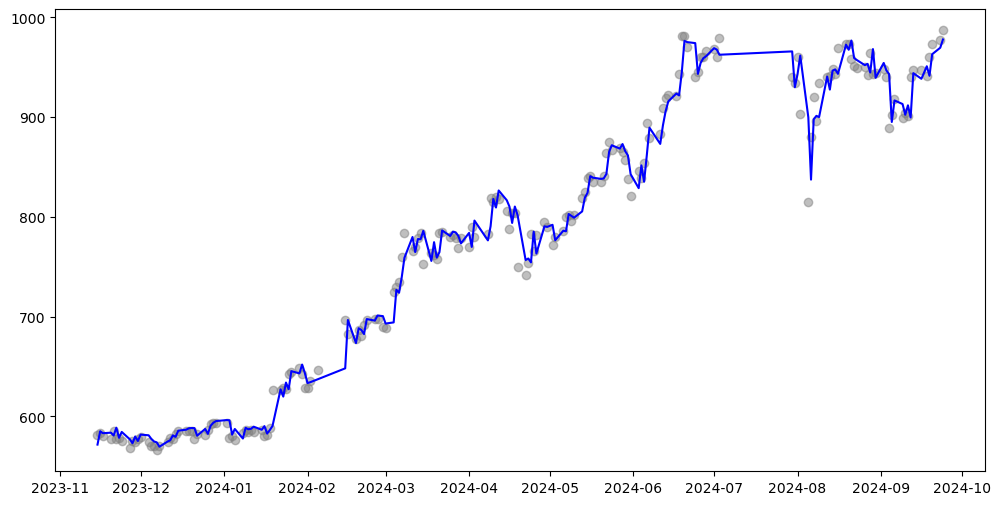

In [52]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Calculate the prediction standard deviation and confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(final_model)

# Create a funnel plot with the confidence interval
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, 'o', label='Actual Values', color='gray', alpha=0.5)  # Plot actual values
plt.plot(df['Date'], predictions, label='Predicted Values', color='blue')  # Plot predicted values
plt.fill_between(df['Date'], iv_l, iv_u, color='blue', alpha=0.2, label='95% Confidence Interval')  # Confidence interval

# Customize the plot
plt.title(f'Multiple Linear Regression Prediction Funnel (Best Features: {", ".join(best_features)})')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print prediction error
mse = np.mean((y - predictions)**2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Forecasting Future Values Using the Best Feature Combination

This Python code performs time series forecasting for the next month, extending the model's predictions into the future based on the best feature combination. It also calculates and prints prediction intervals for both current and future predictions.

Steps:
1. **Print the Best Features and Model Parameters**: Display the selected best features and confirm that the model parameters are in the correct order.
2. **Set a Future Start Date and Generate Future Dates**: Create a date range starting from '2024-09-01' for 30 days into the future.
3. **Generate Future Feature Values**: Extrapolate future feature values based on trends observed in the last 30 days, with added noise proportional to the standard deviation of each feature.
4. **Ensure Feature Order**: The future features (`X_future`) are ordered to match the model parameters to ensure correct predictions.
5. **Make Predictions and Calculate Confidence Intervals**: Use the final model to predict values for the next month and calculate prediction intervals for both the current and future predictions.

**Prompt**: “Write Python code that extends the time series prediction to include future dates and forecast values for the next month based on the best feature combination"

In [ ]:
print("Best Features:", best_features)
print("Model Parameters:", final_model.params.index.tolist())

# Set the future start date for predictions
future_start_date = pd.to_datetime('2024-09-01')

# Create a date range for the next 30 days
future_dates = pd.date_range(start=future_start_date, periods=30)
future_df = pd.DataFrame({'Date': future_dates})

# Generate future feature values based on trends and noise
for feature in best_features:
    last_value = X[feature].iloc[-1]
    trend = (X[feature].iloc[-1] - X[feature].iloc[-30]) / 30  # Calculate 30-day trend
    std_dev = X[feature].std()  # Calculate standard deviation
    future_df[feature] = [last_value + trend * i + random.gauss(0, std_dev * 0.1) for i in range(30)]

# Manually add a constant term
future_df['const'] = 1

# Ensure the columns in future_df are in the same order as model parameters
X_future = future_df[final_model.params.index]

print("X_future Columns:", X_future.columns.tolist())
print("X_future Shape:", X_future.shape)
print("final_model.params Shape:", final_model.params.shape)

# Make current and future predictions
predictions = final_model.predict(X_best)
future_predictions = final_model.predict(X_future)

# Calculate confidence intervals for current and future predictions
_, iv_l, iv_u = wls_prediction_std(final_model)
_, future_iv_l, future_iv_u = wls_prediction_std(final_model, exog=X_future)

Best Features: ('x1', 'x2', 'x3', 'x4', 'x5')
Model Parameters: ['const', 'x1', 'x2', 'x3', 'x4', 'x5']
X_future Columns: ['const', 'x1', 'x2', 'x3', 'x4', 'x5']
X_future Shape: (30, 6)
final_model.params Shape: (6,)


# Visualizing Predictions and Confidence Intervals for Current and Future Data

The following Python code generates a plot that shows both current and future predictions made by the regression model, along with 95% confidence intervals. It also calculates and prints the MSE and RMSE for the model's predictions based on the actual data.

Steps:
1. **Plot Actual Values**: The actual data (`y`) is plotted as gray points.
2. **Plot Current Predictions**: Predictions within the known data range are plotted as a blue line, with a shaded blue region representing the confidence interval.
3. **Plot Future Predictions**: Predictions for the next 30 days are plotted as a red line, with a shaded red region representing the future confidence interval.
4. **Mark the Start of Future Predictions**: A green dashed line indicates the date when future predictions begin.
5. **Adjust x-axis**: Ensure that the x-axis covers both the actual data and future predictions.
6. **Calculate and Print Error Metrics**: The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are calculated and printed.

**Prompt**: “Write Python code that generates a plot to compare actual values, current predictions, and future predictions, along with their confidence intervals"

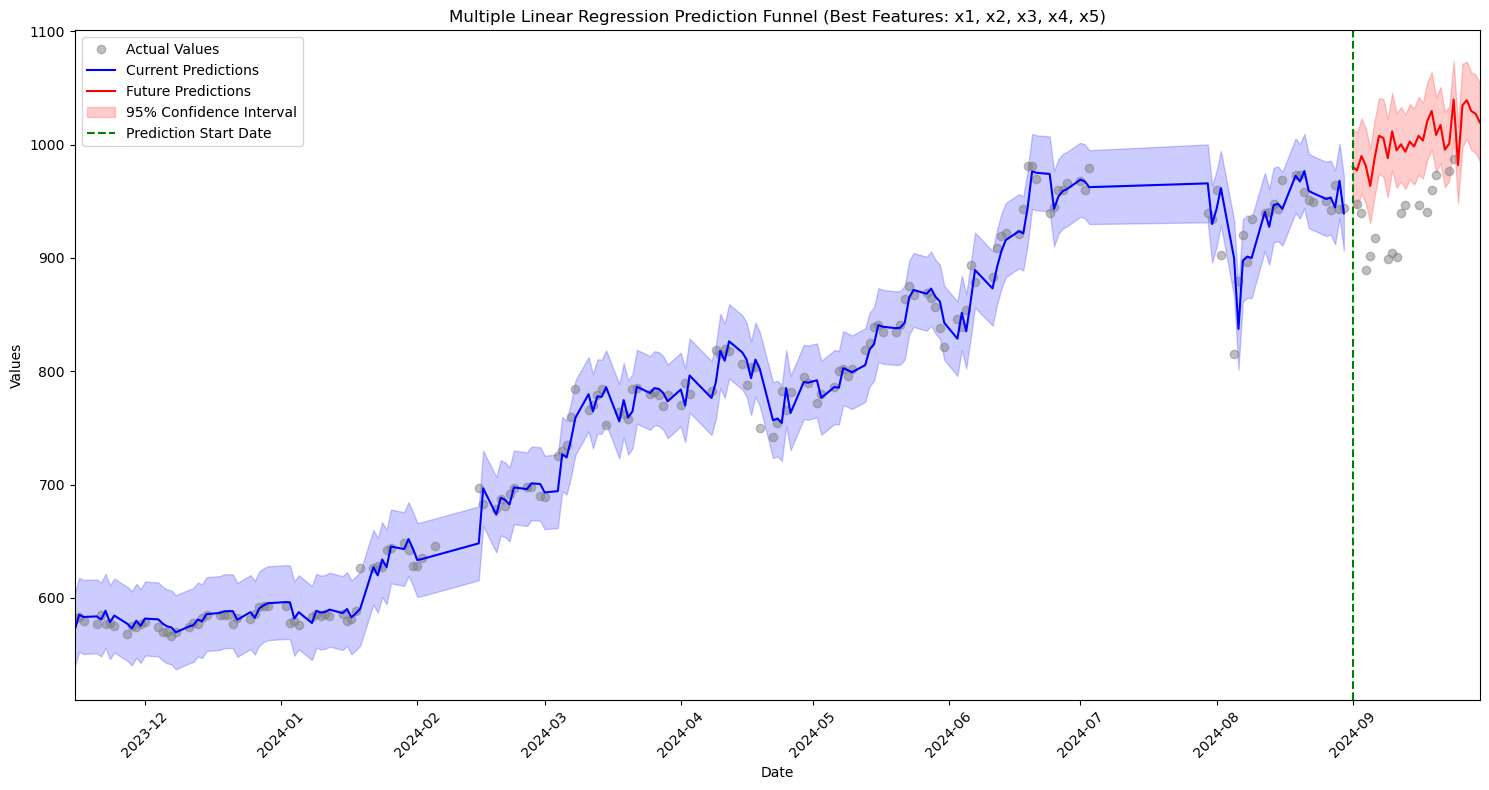

Mean Squared Error (MSE): 260.31
Root Mean Squared Error (RMSE): 16.13


In [ ]:
# Plotting the predictions and confidence intervals
plt.figure(figsize=(15, 8))

# Plot actual data
plt.plot(df['Date'], y, 'o', label='Actual Values', color='gray', alpha=0.5)

# Plot current predictions within known data range (blue)
mask = df['Date'] < future_start_date
plt.plot(df['Date'][mask], predictions[mask], label='Current Predictions', color='blue')

# Plot confidence interval for current predictions (blue)
plt.fill_between(df['Date'][mask], iv_l[mask], iv_u[mask], color='blue', alpha=0.2)

# Plot future predictions (red)
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')

# Plot confidence interval for future predictions (red)
plt.fill_between(future_dates, future_iv_l, future_iv_u, color='red', alpha=0.2, label='95% Confidence Interval')

# Draw a vertical line for the start of future predictions
plt.axvline(x=future_start_date, color='green', linestyle='--', label='Prediction Start Date')

# Customize the plot
plt.title(f'Multiple Linear Regression Prediction Funnel (Best Features: {", ".join(best_features)})')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)

# Adjust the x-axis to show all data and future predictions
plt.xlim(df['Date'].min(), future_dates[-1])

# Make the layout tight to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print error metrics (based on actual data and current predictions)
mse = np.mean((y - predictions)**2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")